In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
data_path = '/home/luna/phedata.csv'
data = pd.read_csv(data_path)
data.describe()


,alkanes,primary alcohols,sec. alcohols,primary fatty acids
count,274.000000,274.000000,274.000000,274.000000
mean,60.166043,53.328113,9.416510,98.499793
std,83.156200,42.173650,7.744314,79.055443
min,1.447411,2.791488,0.000000,0.000000
25%,15.329865,25.503873,4.316885,45.088071
50%,25.535382,39.944399,7.243286,76.415907
75%,79.396778,73.511524,12.896460,129.326249
max,838.194025,366.136286,57.979051,567.404181


In [3]:
# normalization
columns_to_normalize = ['alkanes', 'primary alcohols', 'primary fatty acids']

for column in columns_to_normalize:
    data[column + '_norm'] = (data[column] - data[column].min()) / (data[column].max() - data[column].min())
    #data[column+ '_mean'] = data[column]/data[column].sum()
    
#data['primary alcohols'].sum()
data.describe()

,alkanes,primary alcohols,sec. alcohols,primary fatty acids,alkanes_norm,primary alcohols_norm,primary fatty acids_norm
count,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000,274.000000
mean,60.166043,53.328113,9.416510,98.499793,0.070175,0.139087,0.173597
std,83.156200,42.173650,7.744314,79.055443,0.099380,0.116071,0.139328
min,1.447411,2.791488,0.000000,0.000000,0.000000,0.000000,0.000000
25%,15.329865,25.503873,4.316885,45.088071,0.016591,0.062509,0.079464
50%,25.535382,39.944399,7.243286,76.415907,0.028788,0.102252,0.134676
75%,79.396778,73.511524,12.896460,129.326249,0.093158,0.194636,0.227926
max,838.194025,366.136286,57.979051,567.404181,1.000000,1.000000,1.000000


In [4]:
#grous = data['group']
groups = data['group'].unique()
print(groups)

['F2' '6' '1' '4' '7' '5']


In [5]:
colors = plt.cm.jet(np.linspace(0, 1, len(groups)))
# group_colors = dict(zip(groups, colors))
group_colors = {'F2': 'green', '1': 'blue', '5': 'yellow', '4': 'red', '6': 'purple', '7': 'pink'}

#parent_group_colors = {'E12': 'blue', 'E4': 'yellow'}

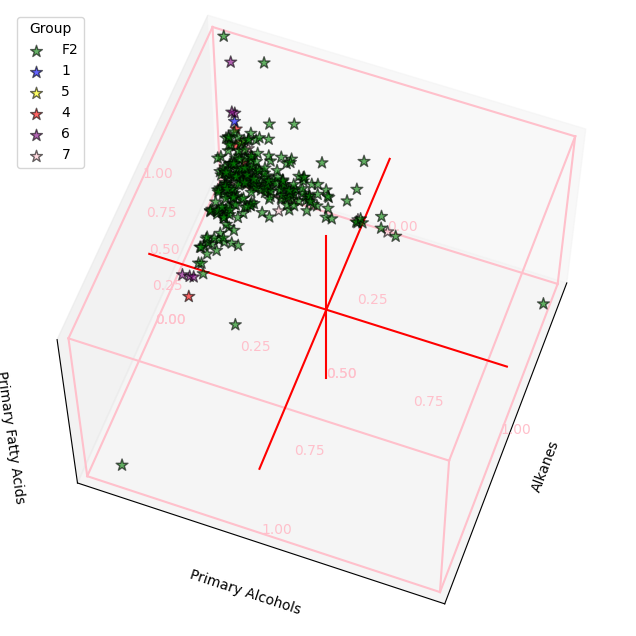

In [6]:
# image size
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# box vertexs
points = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1]])

# box edges
edges = [(0, 1), (1, 3), (3, 2), (2, 0), (4, 5), (5, 7), (7, 6), (6, 4), (0, 4), (1, 5), (2, 6), (3, 7)]

# draw box
for edge in edges:
    p1, p2 = points[edge[0]], points[edge[1]]
    ax.plot3D(*zip(p1, p2), color="pink")

# draw mid line
ax.plot3D([0.5, 0.5], [0.5, 0.5], [0, 1], color="r")  # Z
ax.plot3D([0.5, 0.5], [0, 1], [0.5, 0.5], color="r")  # Y
ax.plot3D([0, 1], [0.5, 0.5], [0.5, 0.5], color="r")  # X

# add ruler（use text）
for x_tick in np.linspace(0, 1, 5):
    ax.text(x_tick, 0.5, 0, '{:.2f}'.format(x_tick), color="pink")

for y_tick in np.linspace(0, 1, 5):
    ax.text(0.5, y_tick, 0, '{:.2f}'.format(y_tick), color="pink")

for z_tick in np.linspace(0, 1, 5):
    ax.text(0.5, 0, z_tick, '{:.2f}'.format(z_tick), color="pink")

alpha_value = 0.6
point_size = 80 
marker_shape = '*' 

# 'o'：圆形
# 's'：方形
# '^'：上三角
# '>'：右三角
# '<'：左三角
# 'v'：下三角
# 'p'：五边形
# 'P'：加号（填充的）
# '*'：星形
# 'h'：六边形1
# 'H'：六边形2
# '+'：加号
# 'x'：乘号
# 'D'：菱形
# 'd'：薄菱形
# '|'：垂直线
# '_'：水平线

for group, color in group_colors.items():

    subset = data[data['group'] == group]
    #subset = data[data['group'].isin(['E4', 'E12'])]
    ax.scatter(subset['alkanes_norm'], subset['primary alcohols_norm'], subset['primary fatty acids_norm'],
               c=color, edgecolor='k', s=point_size, alpha=alpha_value, marker=marker_shape,
               depthshade=True, label=group)
    
    #subParent = data[data['group'].isin(['E4', 'E12'])]
    #ax.scatter(subParent['alkanes_norm'], subParent['primary alcohols_norm'], subParent['primary fatty acids_norm'],
    #           c=color, edgecolor='k', s=point_size, alpha=alpha_value, marker=marker_shape,
    #           depthshade=True, label=group)
    
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

# hide real axis
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

ax.set_xlabel('Alkanes')
ax.set_ylabel('Primary Alcohols')
ax.set_zlabel('Primary Fatty Acids')
ax.legend(title='Group')

ax.view_init(elev=60, azim=20)
plt.savefig('allGroup.png')
plt.show()